In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))


scikit-learn==0.23.2
pandas==1.1.3
numpy==1.18.5


In [3]:
import matplotlib.pyplot as plt
import re as re
import seaborn as sns
sns.set()
%matplotlib inline 

In [4]:
train_data = pd.read_csv("../input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("../input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Function that define all the EDA we need 
def EDA(df):
    print("\n_____ INFO _____")
    print(df.info())
    print("\n_____ Describe _____")
    print(df.describe(include='all'))
    print("\n_____ Columns _____")
    print(df.columns)
    print("\n_____ Missing Values _____")
    print(df.isnull().sum())
    print("\n_____ NULL values _____")
    print(df.isna().sum())
    print("\n_____ Shape Of Data _____")
    print(df.shape)

In [7]:
print("__________ Train Data __________")
EDA(train_data)
print("__________ Test data __________")
EDA(test_data)

__________ Train Data __________

_____ INFO _____
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

_____ Describe _____
        PassengerId    Survived      Pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN      

In [8]:
test_data_Passid = test_data.PassengerId
test_data_Passid[0:4]

0    892
1    893
2    894
3    895
Name: PassengerId, dtype: int64

In [9]:
# Lets drop the variables 'Cabin'(as it has too many missing values) and 'Ticket'(as it yields no meaningful infomation)
# form the Train and test data

train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combine_data = [train_data, test_data]

In [10]:
# lets find the impact of Pclass on the Survived -- in the train dataset
print(train_data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [11]:
# lets find the impact of Sex on the Survived -- in the train dataset

print(train_data[['Sex','Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [12]:
# lets create a new feature 'Familysize' by combining the variables 'SibSp' (number of siblings and spouse)  
# and 'Parch' (number of parents and children) 

for data in combine_data:
    data['Familysize'] = data['SibSp'] + data['Parch'] +1
print(train_data[['Familysize','Survived']].groupby(['Familysize'], as_index=False).mean())    


   Familysize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [13]:
# lets create a new variable 'IsAlone' to check whether the person is Alone or has Family.

for data in combine_data:
    data['IsAlone'] = 0
    data.loc[data['Familysize'] == 1, 'IsAlone'] = 1

print(train_data[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean())    


   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [14]:
# Handling missing values for 'Age' variable in both the train and the test dataset..

for data in combine_data:
    age_avg = data['Age'].mean()
    age_std = data['Age'].std()
    age_null_count = data['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    data['Age'][np.isnan(data['Age'])] = age_null_random_list
    data['Age'] = data['Age'].astype('int32')   
    
    train_data['CategoricalAge'] = pd.cut(train_data['Age'], 5)

print (train_data[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.527273
1   (16.0, 32.0]  0.347630
2   (32.0, 48.0]  0.383721
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [15]:
# Test data has one missing Fare value.. lets fill it up using mean() value.

avg_Fare_test = test_data['Fare'].astype('float64').mean(axis=0)
test_data['Fare'].replace(np.nan, avg_Fare_test, inplace=True)

for data in combine_data:
    train_data['CategoricalFare'] = pd.qcut(train_data['Fare'], 5)
print (train_data[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())
    


     CategoricalFare  Survived
0    (-0.001, 7.854]  0.217877
1      (7.854, 10.5]  0.201087
2     (10.5, 21.679]  0.424419
3   (21.679, 39.688]  0.444444
4  (39.688, 512.329]  0.642045


In [16]:
# lets work on the variable Embarked ... the train dataset has couple of missing values so lets fill themup.
top_port = train_data['Embarked'].value_counts().idxmax()

for data in combine_data:
    data['Embarked'] = data['Embarked'].fillna(top_port) 
print (train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [17]:
# Mapping Age
for data in combine_data:
    
    data.loc[ data['Age'] <= 16, 'Age']                       = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age']                        = 4


In [18]:
# Mapping Fare
for data in combine_data:
    
    data.loc[ data['Fare'] <= 7.91, 'Fare']                            = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare']                               = 3
    data['Fare'] = data['Fare'].astype(int)

In [19]:
train_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [20]:
# lets work with the Extracting the Titles from the Names

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for data in combine_data:
    data['Title'] = data['Name'].apply(get_title)

print(pd.crosstab(train_data['Title'], train_data['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [21]:
for data in combine_data:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                           'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

print (train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [22]:
# Mapping titles
for data in combine_data:
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)

In [23]:
train_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Familysize         0
IsAlone            0
CategoricalAge     0
CategoricalFare    0
Title              0
dtype: int64

In [24]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Familysize     0
IsAlone        0
Title          0
dtype: int64

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,IsAlone,CategoricalAge,CategoricalFare,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,0,S,2,0,"(16.0, 32.0]","(-0.001, 7.854]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,3,C,2,0,"(32.0, 48.0]","(39.688, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,1,S,1,1,"(16.0, 32.0]","(7.854, 10.5]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,3,S,2,0,"(32.0, 48.0]","(39.688, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,1,S,1,1,"(32.0, 48.0]","(7.854, 10.5]",1


In [26]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,IsAlone,Title
0,892,3,"Kelly, Mr. James",male,2,0,0,0,Q,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2,1,0,0,S,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",male,3,0,0,1,Q,1,1,1
3,895,3,"Wirz, Mr. Albert",male,1,0,0,1,S,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,1,1,S,3,0,3


In [27]:
# lets clean the datasets..
drop_cols = ['PassengerId','Name','SibSp','Parch','Familysize']
train_data = train_data.drop(drop_cols, axis=1)
train_data = train_data.drop(['CategoricalAge','CategoricalFare'], axis=1)

test_data = test_data.drop(drop_cols, axis=1)


In [28]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,male,1,0,S,0,1
1,1,1,female,2,3,C,0,3
2,1,3,female,1,1,S,1,2
3,1,1,female,2,3,S,0,3
4,0,3,male,2,1,S,1,1


In [29]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,3,male,2,0,Q,1,1
1,3,female,2,0,S,0,3
2,2,male,3,1,Q,1,1
3,3,male,1,1,S,1,1
4,3,female,1,1,S,0,3


In [30]:
#Lets check the Object type variables in Train and Test datasets..

train_data["Pclass"] = train_data["Pclass"].astype("object")
test_data["Pclass"] = test_data["Pclass"].astype("object")

object_cols =[col for col in train_data.columns if train_data[col].dtype == "object"]
#object_cols_list = list(object_cols[object_cols].index) 
print("List of catgorical variables:")
print(object_cols)

List of catgorical variables:
['Pclass', 'Sex', 'Embarked']


In [31]:
#Lets apply one hot encoding to the Object type variables

from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore',dtype='int', sparse=False)

train_data_OH_cols = pd.DataFrame(OH_encoder.fit_transform(train_data[object_cols]))
test_data_OH_cols = pd.DataFrame(OH_encoder.transform(test_data[object_cols]))

train_data_OH_cols.index = train_data.index
test_data_OH_cols.index = test_data.index

num_train_data = train_data.drop(object_cols,axis=1)
num_test_data = test_data.drop(object_cols,axis=1)

OH_train_data = pd.concat([num_train_data, train_data_OH_cols], axis=1)
OH_test_data = pd.concat([num_test_data, test_data_OH_cols], axis=1)

In [32]:
OH_train_data.head()

,Survived,Age,Fare,IsAlone,Title,0,1,2,3,4,5,6,7
0,0,1,0,0,1,0,0,1,0,1,0,0,1
1,1,2,3,0,3,1,0,0,1,0,1,0,0
2,1,1,1,1,2,0,0,1,1,0,0,0,1
3,1,2,3,0,3,1,0,0,1,0,0,0,1
4,0,2,1,1,1,0,0,1,0,1,0,0,1


In [33]:
OH_test_data.head()

,Age,Fare,IsAlone,Title,0,1,2,3,4,5,6,7
0,2,0,1,1,0,0,1,0,1,0,1,0
1,2,0,0,3,0,0,1,1,0,0,0,1
2,3,1,1,1,0,1,0,0,1,0,1,0
3,1,1,1,1,0,0,1,0,1,0,0,1
4,1,1,0,3,0,0,1,1,0,0,0,1


In [34]:
OH_train_data.columns = ['Survived', 'Age', 'Fare', 'IsAlone','Title', 'Pclass 1', 'Pclass 2', 'Pclass 3', 'Male', 'Female', 'E_C','E_Q','E_S']
OH_train_data.head()


,Survived,Age,Fare,IsAlone,Title,Pclass 1,Pclass 2,Pclass 3,Male,Female,E_C,E_Q,E_S
0,0,1,0,0,1,0,0,1,0,1,0,0,1
1,1,2,3,0,3,1,0,0,1,0,1,0,0
2,1,1,1,1,2,0,0,1,1,0,0,0,1
3,1,2,3,0,3,1,0,0,1,0,0,0,1
4,0,2,1,1,1,0,0,1,0,1,0,0,1


In [35]:
OH_test_data.columns = ['Age', 'Fare', 'IsAlone','Title', 'Pclass 1', 'Pclass 2', 'Pclass 3', 'Male', 'Female', 'E_C','E_Q', 'E_S']
OH_test_data

,Age,Fare,IsAlone,Title,Pclass 1,Pclass 2,Pclass 3,Male,Female,E_C,E_Q,E_S
0,2,0,1,1,0,0,1,0,1,0,1,0
1,2,0,0,3,0,0,1,1,0,0,0,1
2,3,1,1,1,0,1,0,0,1,0,1,0
3,1,1,1,1,0,0,1,0,1,0,0,1
4,1,1,0,3,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,2,1,1,1,0,0,1,0,1,0,0,1
414,2,3,1,5,1,0,0,1,0,1,0,0
415,2,0,1,1,0,0,1,0,1,0,0,1
416,1,1,1,1,0,0,1,0,1,0,0,1


In [36]:
X = OH_train_data.iloc[:,1:]
X.head()

,Age,Fare,IsAlone,Title,Pclass 1,Pclass 2,Pclass 3,Male,Female,E_C,E_Q,E_S
0,1,0,0,1,0,0,1,0,1,0,0,1
1,2,3,0,3,1,0,0,1,0,1,0,0
2,1,1,1,2,0,0,1,1,0,0,0,1
3,2,3,0,3,1,0,0,1,0,0,0,1
4,2,1,1,1,0,0,1,0,1,0,0,1


In [37]:
y = OH_train_data.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
X.shape, y.shape

((891, 12), (891,))

### Classifier comparison and Model selection

                   Classifier  Accuracy
0  GradientBoostingClassifier  0.904106
0                         SVC  0.904064
0      RandomForestClassifier  0.895367
0        KNeighborsClassifier  0.895339
0      DecisionTreeClassifier  0.894174
0          LogisticRegression  0.889152
0          AdaBoostClassifier  0.889125
0                  GaussianNB  0.863005


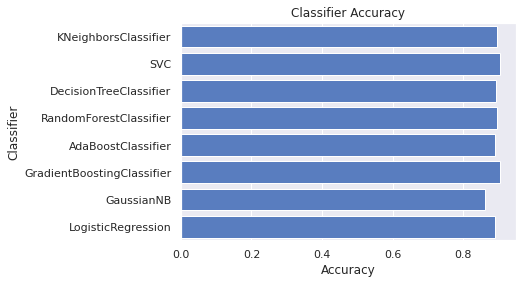

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


classifiers = [
    KNeighborsClassifier(10),
    SVC(probability=True),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(criterion='entropy'),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    #XGBClassifier(),
    GaussianNB(),    
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log      = pd.DataFrame(columns=log_cols)

acc_dict = {}

skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

for train_index, test_index in skf.split(X, y):    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        clf_pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test, clf_pred)
        if name in acc_dict:
            acc_dict[name] += acc_score
        else:
            acc_dict[name] = acc_score

            
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 9.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)
    
print(log.sort_values(by=['Accuracy'], ascending=False))
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")            
            

In [41]:
from sklearn.model_selection import GridSearchCV

est = SVC(probability=True)

p_dist = {
            'C'  :[.01, .1, .5, 1.0],
            'kernel' :['linear', 'poly', 'rbf', 'sigmoid'],
            'degree' :[3, 4, 5]
          }
                         

def hp_tune(est, p_dist, X, y):
    gridsearch = GridSearchCV(est, param_grid=p_dist, scoring='accuracy', n_jobs=-1, cv=4)
    gridsearch.fit(X, y)
    hp_tune_params = gridsearch.best_params_
    hp_tune_score = gridsearch.best_score_
    return hp_tune_params, hp_tune_score

svc_params, svc_score = hp_tune(est, p_dist, X, y)
print(svc_params)
print(svc_score)
    

{'C': 1.0, 'degree': 3, 'kernel': 'poly'}
0.8159415020401567


In [42]:
svc_clf = SVC(C=1.0, degree=3, kernel='poly', probability=True, random_state=42)                        

In [43]:
svc_clf.fit(X, y)

SVC(kernel='poly', probability=True, random_state=42)

In [44]:
# save the model to disk
import pickle

pickle.dump(svc_clf, open("svc_pkl.pkl", "wb")) 

In [45]:
test_pred = svc_clf.predict(OH_test_data)

In [46]:
Titanic_pred = pd.DataFrame({'PassengerId': test_data_Passid,
                       'Survived': test_pred})

Titanic_pred.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
